<a href="https://colab.research.google.com/github/chaimabenabda2/Deep_Learning/blob/main/minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Dimension de X_train', X_train.shape)
print('Dimension de y_train', y_train.shape)
print('Dimension de X_test', X_test.shape)
print('Dimension de y_test', y_test.shape)

Dimension de X_train (60000, 28, 28)
Dimension de y_train (60000,)
Dimension de X_test (10000, 28, 28)
Dimension de y_test (10000,)


In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
nb_classes = 10
print('Dimension avant one-hot-encoder', y_train.shape)

Dimension avant one-hot-encoder (60000,)


In [ ]:
Y_train = to_categorical(y_train,nb_classes)  

-somme toutes les données pi log qi softmax 

In [ ]:
print('Dimension apres one-hot-encoder', Y_train.shape)

Dimension apres one-hot-encoder (60000, 10)


In [ ]:
y_train[1]

0

In [ ]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
Y_test = to_categorical(y_test,nb_classes)

In [ ]:
history = model.fit(X_train,Y_train,
                   batch_size = 100,
                   epochs =100 ,
                   verbose = 2,
                   validation_data = (X_test,Y_test))

Epoch 1/100
600/600 - 7s - loss: 0.2396 - accuracy: 0.9277 - val_loss: 0.1006 - val_accuracy: 0.9699 - 7s/epoch - 12ms/step
Epoch 2/100
600/600 - 7s - loss: 0.0988 - accuracy: 0.9697 - val_loss: 0.0764 - val_accuracy: 0.9755 - 7s/epoch - 12ms/step
Epoch 3/100
600/600 - 7s - loss: 0.0713 - accuracy: 0.9774 - val_loss: 0.0717 - val_accuracy: 0.9763 - 7s/epoch - 12ms/step
Epoch 4/100
600/600 - 7s - loss: 0.0575 - accuracy: 0.9813 - val_loss: 0.0683 - val_accuracy: 0.9790 - 7s/epoch - 12ms/step
Epoch 5/100
600/600 - 7s - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.0686 - val_accuracy: 0.9769 - 7s/epoch - 12ms/step
Epoch 6/100
600/600 - 6s - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.0620 - val_accuracy: 0.9813 - 6s/epoch - 11ms/step
Epoch 7/100
600/600 - 7s - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0757 - val_accuracy: 0.9793 - 7s/epoch - 12ms/step
Epoch 8/100
600/600 - 8s - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0733 - val_accuracy: 0.9794 - 8s/epoch - 13ms/step
Epoch 9/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

**Enregistrement du modèle**

In [ ]:
import os
save_dir = 'C:/Utilisateurs/MSI/ANN_HandwrittenMNIST'

In [ ]:
model_name = 'keras_MNIST.h5'
model_path = os.path.join(save_dir,model_name)

In [ ]:
model.save(model_path)

In [ ]:
print('Modele renregistre dans %s' % model_path)

Modele renregistre dans C:/Utilisateurs/MSI/ANN_HandwrittenMNIST/keras_MNIST.h5


https://commentouvrir.com/extension/h5

**Visualiser les metriques**

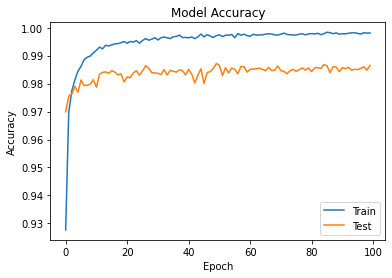

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

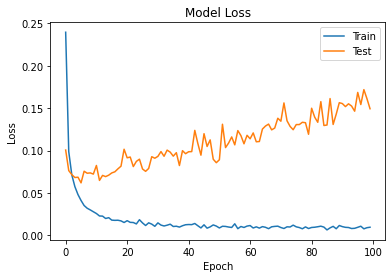

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])